In [2]:
import numpy as np
import pandas as pd
import datetime
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import talib

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 50
display(HTML("<style>.container {width:100% !important} <\style>"))
%matplotlib inline

In [3]:
### get data
data= pd.read_excel(r"C:\Users\PC\Documents\ArbAlgo\data\bitmex_hist_data\2017-01-01_to_2017-12-31_1min.xlsx")
data0= pd.read_excel(r"C:\Users\PC\Documents\ArbAlgo\data\bitmex_hist_data\2018-01-01_to_2018-04-01_1min.xlsx")
data1= pd.read_excel(r"C:\Users\PC\Documents\ArbAlgo\data\bitmex_hist_data\2018-04-01_to_2018-07-01_1min.xlsx")
data2= pd.read_excel(r"C:\Users\PC\Documents\ArbAlgo\data\bitmex_hist_data\2018-07-01_to_2018-10-01_1min.xlsx")
data3= pd.read_excel(r"C:\Users\PC\Documents\ArbAlgo\data\bitmex_hist_data\2018-10-01_to_2018-11-21_1min.xlsx")
data4= pd.read_excel(r"C:\Users\PC\Documents\ArbAlgo\data\bitmex_hist_data\2018-11-22_to_2019-01-03_1min.xlsx")

master = data.append(data0)
master = master.append(data1)
master = master.append(data2)
master = master.append(data3)
master = master.append(data4)
master = master.dropna()
master.index = pd.to_datetime(master["timestamp"])
master = master.drop("timestamp",axis= "columns")
cols = ["bid_open","bid_high","bid_low","bid_close","ask_open","ask_high","ask_low","ask_close"]
master[cols] = master[cols].astype(float)
display(master.head())
master.tail()

,bid_open,bid_high,bid_low,bid_close,ask_open,ask_high,ask_low,ask_close
timestamp,,,,,,,,
2017-01-01 00:00:00,967.59,967.68,967.59,967.66,968.49,968.76,968.49,968.70
2017-01-01 00:01:00,967.66,968.22,967.20,967.21,968.70,968.70,968.43,968.43
2017-01-01 00:02:00,967.21,967.21,967.21,967.21,968.43,968.63,967.49,967.49
2017-01-01 00:03:00,967.21,967.21,966.74,966.97,967.49,967.49,966.99,967.00
2017-01-01 00:04:00,966.97,966.97,966.96,966.96,967.00,967.00,967.00,967.00


,bid_open,bid_high,bid_low,bid_close,ask_open,ask_high,ask_low,ask_close
timestamp,,,,,,,,
2019-01-02 23:55:00,3885.0,3885.0,3881.0,3882.5,3885.5,3885.5,3881.5,3883.0
2019-01-02 23:56:00,3882.5,3882.5,3881.0,3882.0,3883.0,3883.0,3881.5,3882.5
2019-01-02 23:57:00,3882.0,3884.5,3882.0,3884.5,3882.5,3885.0,3882.5,3885.0
2019-01-02 23:58:00,3884.5,3887.5,3884.5,3887.5,3885.0,3888.0,3885.0,3888.0
2019-01-02 23:59:00,3887.5,3887.5,3887.5,3887.5,3888.0,3888.0,3888.0,3888.0


In [4]:
data = master.copy()

## resample

In [5]:
data = data.resample("15min").ohlc()
new_data = pd.DataFrame()
new_data["timestamp"] = data.index
for side in ["bid","ask"]:
    for point in ["open","high","low","close"]:
        major = side+"_"+point
        new_data[major] = data[major][point].values  
data = new_data
data = data.dropna(axis="rows")
data = data.reset_index(drop=True)
data.head(5)   

,timestamp,bid_open,bid_high,bid_low,bid_close,ask_open,ask_high,ask_low,ask_close
0,2017-01-01 00:00:00,967.59,968.22,964.68,964.85,968.49,968.76,964.99,964.99
1,2017-01-01 00:15:00,964.71,965.14,964.54,964.92,964.99,965.99,964.99,965.23
2,2017-01-01 00:30:00,964.92,967.01,964.91,966.07,965.21,967.87,965.17,967.44
3,2017-01-01 00:45:00,966.07,967.64,966.07,967.62,967.45,968.34,967.39,968.29
4,2017-01-01 01:00:00,967.62,967.62,966.29,966.29,968.20,968.20,966.63,966.83


### Calculate ATR

In [6]:
data["atr"] = talib.ATR(data["ask_high"],data["ask_low"],data["ask_close"],timeperiod=80)
data = data.dropna(axis="rows")
data = data.reset_index(drop=True)
data.head()

,timestamp,bid_open,bid_high,bid_low,bid_close,ask_open,ask_high,ask_low,ask_close,atr
0,2017-01-01 20:00:00,998.54,1001.65,997.80,1001.65,999.54,1002.50,997.99,1002.15,2.662250
1,2017-01-01 20:15:00,1001.26,1003.47,1001.01,1003.47,1002.50,1004.32,1001.49,1004.32,2.664347
2,2017-01-01 20:30:00,1003.47,1006.61,999.16,1002.38,1004.38,1007.00,1000.00,1002.39,2.718543
3,2017-01-01 20:45:00,1002.38,1003.40,1000.87,1002.17,1002.40,1002.50,1000.99,1002.50,2.703436
4,2017-01-01 21:00:00,1002.17,1004.33,1001.31,1001.99,1002.50,1003.29,1001.72,1002.00,2.689268


In [7]:
atr_size = 20
data["long_trail"] = data["ask_high"] - (data["atr"]*atr_size)
data["short_trail"] = data["bid_low"] + (data["atr"]*atr_size) 
data[["long_trail","short_trail"]] = data[["long_trail","short_trail"]].shift(1)
data = data.dropna()
data = data.reset_index(drop=True)
data.head()

,timestamp,bid_open,bid_high,bid_low,bid_close,ask_open,ask_high,ask_low,ask_close,atr,long_trail,short_trail
0,2017-01-01 20:15:00,1001.26,1003.47,1001.01,1003.47,1002.50,1004.32,1001.49,1004.32,2.664347,949.255000,1051.045000
1,2017-01-01 20:30:00,1003.47,1006.61,999.16,1002.38,1004.38,1007.00,1000.00,1002.39,2.718543,951.033063,1054.296938
2,2017-01-01 20:45:00,1002.38,1003.40,1000.87,1002.17,1002.40,1002.50,1000.99,1002.50,2.703436,952.629149,1053.530851
3,2017-01-01 21:00:00,1002.17,1004.33,1001.31,1001.99,1002.50,1003.29,1001.72,1002.00,2.689268,948.431285,1054.938715
4,2017-01-01 21:15:00,1001.99,1004.42,1001.99,1004.42,1002.00,1004.44,1002.00,1004.43,2.686152,949.504644,1055.095356


### BACKTEST (Calculate the highest high and lowest low for period)

In [8]:
lookback = 80
#data = data[["timestamp","ask_high","bid_low"]]
#mid = data["ask_high"] - data["bid_low"]

data["high_chan"] = data["ask_high"].rolling(window=lookback,min_periods=lookback).max().shift(1)
data["low_chan"] = data["bid_low"].rolling(window=lookback,min_periods=lookback).min().shift(1)

trades = []
buy_trade = {}
sell_trade = {}
long = False
short = False
get = data.at ## just a shortcut to the data.get_value() function

trailing_stop = False

error = 0

#data = data[data["timestamp"]>datetime.datetime(2018,11,16)]
for idx in data.index:   
    try:
        if long == True:
            bid_high = get[idx,"bid_high"] 
            mfe = bid_high - buy_trade["entry"]
            if mfe > buy_trade["mfe"]:
                buy_trade["mfe"] = mfe
                buy_trade["mfe_price"] = bid_high
        elif short == True:
            ask_low = get[idx,"ask_low"] 
            mfe = sell_trade["entry"] - ask_low
            if mfe > sell_trade["mfe"]:
                sell_trade["mfe"] = mfe
                sell_trade["mfe_price"] = ask_low
            
        ### channel trading only
        if (get[idx,"ask_high"] > get[idx,"high_chan"]) and (get[idx,"bid_low"] < get[idx,"low_chan"]):
            print("trade broke both high and low channel, not sure!!!")
            
        elif get[idx,"ask_high"] > get[idx,"high_chan"] and long == False:
            buy_trade["entry_time"] = get[idx,"timestamp"]
            buy_trade["entry"] = get[idx,"high_chan"]
            buy_trade["direction"] = "long"
            buy_trade["mfe"] = 0
            buy_trade["band_size"] = ((get[idx,"high_chan"] - get[idx,"low_chan"])/get[idx,"high_chan"])*100
            long = True
            #print("long")
            if short == True:
                #print("close short")
                sell_trade["exit_time"] = get[idx,"timestamp"]
                sell_trade["exit"] = get[idx,"high_chan"]
                sell_trade["exit_type"] = "channel"
                sell_trade["profit"] = sell_trade["entry"]-sell_trade["exit"]
                trades.append(sell_trade)
                sell_trade = {}
                short = False
    
        elif get[idx,"bid_low"] < get[idx,"low_chan"] and short == False:
            sell_trade["entry_time"] = get[idx,"timestamp"]
            sell_trade["entry"] = get[idx,"low_chan"]
            sell_trade["direction"] = "short"
            sell_trade["mfe"] = 0
            sell_trade["band_size"] = ((get[idx,"high_chan"] - get[idx,"low_chan"])/get[idx,"low_chan"])*100
            short = True
            #print("short")
            if long == True:
                #print("close_long")
                buy_trade["exit_time"] = get[idx,"timestamp"]
                buy_trade["exit"] = get[idx,"low_chan"]
                buy_trade["exit_type"] = "channel"
                buy_trade["profit"] = buy_trade["exit"]-buy_trade["entry"]
                trades.append(buy_trade)
                buy_trade = {}
                long = False
                
        ### trailing stop loss
        if trailing_stop == True:
            if long == True:
                if get[idx,"bid_low"] < get[idx,"long_trail"]:
                    buy_trade["exit_time"] = get[idx,"timestamp"]
                    buy_trade["exit"] = get[idx,"long_trail"]
                    buy_trade["exit_type"] = "trail"
                    buy_trade["profit"] = buy_trade["exit"]-buy_trade["entry"]
                    trades.append(buy_trade)
                    buy_trade = {}
                    long = False
            elif short == True:
                if get[idx,"ask_high"] > get[idx,"short_trail"]:
                    sell_trade["exit_time"] = get[idx,"timestamp"]
                    sell_trade["exit"] = get[idx,"short_trail"]
                    sell_trade["exit_type"] = "trail"
                    sell_trade["profit"] = sell_trade["entry"]-sell_trade["exit"]
                    trades.append(sell_trade)
                    sell_trade = {}
                    short = False                 
            
            
            
    except Exception as e:
        error+=1
        print(e)
        print(data.loc[idx])
        if error >20:
            raise e
        continue

if len(buy_trade) > 0:
    buy_trade["exit_time"] = get[idx,"timestamp"]
    buy_trade["exit"] = get[idx,"bid_close"]
    buy_trade["exit_type"] = "channel"
    buy_trade["profit"] = buy_trade["exit"]-buy_trade["entry"]
    trades.append(buy_trade)
    buy_trade = {}
    long = False
if len(sell_trade) > 0:
    sell_trade["exit_time"] = get[idx,"timestamp"]
    sell_trade["exit"] = get[idx,"ask_close"]
    sell_trade["exit_type"] = "channel"
    sell_trade["profit"] = sell_trade["entry"]-sell_trade["exit"]
    trades.append(sell_trade)
    sell_trade = {}
    short = False
        


master_trades = pd.DataFrame(trades)
master_trades["mfe%"] = (master_trades["mfe"] / master_trades["entry"])*100
master_trades["profit%"] = (master_trades["profit"] / master_trades["entry"])*100
master_trades.head()

,band_size,direction,entry,entry_time,exit,exit_time,exit_type,mfe,mfe_price,profit,mfe%,profit%
0,3.788201,long,1034.00,2017-01-02 16:15:00,1003.53,2017-01-03 09:45:00,channel,2.70,1036.70,-30.47,0.261122,-2.946809
1,3.361135,short,1003.53,2017-01-03 09:45:00,1036.07,2017-01-03 23:15:00,channel,0.00,NaN,-32.54,0.000000,-3.242554
2,3.191869,long,1036.07,2017-01-03 23:15:00,1067.00,2017-01-05 09:15:00,channel,143.99,1180.06,30.93,13.897710,2.985320
3,10.638238,short,1067.00,2017-01-05 09:15:00,909.67,2017-01-07 16:00:00,channel,261.97,805.03,157.33,24.552015,14.745080
4,11.506370,long,909.67,2017-01-07 16:00:00,881.24,2017-01-08 17:30:00,channel,28.73,938.40,-28.43,3.158288,-3.125309


In [9]:
trades = master_trades.copy()

In [10]:
print(trades["exit_type"].notnull().sum(),"trades")
trades["exit_type"].value_counts().to_dict()

475 trades


{'channel': 475}

In [11]:
## add slippage and costs
print(round(trades["profit"].mean()),"($) avg profit per trade before fees and slippage")
trades["net_profit"] = trades["profit"]-(trades["entry"]*0.075/100*2)
print(round(trades["net_profit"].mean()),"($) avg profit per trade after fees and slippage")
print(trades["net_profit"].sum().round(),"($) total profit")

68 ($) avg profit per trade before fees and slippage
60 ($) avg profit per trade after fees and slippage
28358.0 ($) total profit


max_dd($): 2868.0
dd(%)    : 10.0
profit($): 28358.0
profit per trade: 59.70145495789474


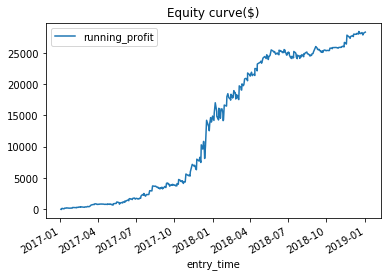

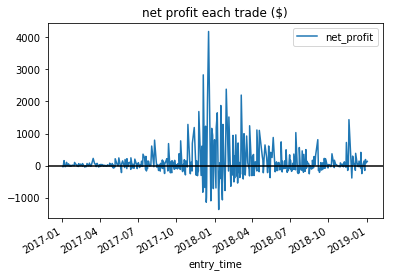

In [12]:
trades["running_profit"] = trades["net_profit"].cumsum()
trades.plot(x="entry_time",y="running_profit",title="Equity curve($)")
trades.plot(x="entry_time",y="net_profit",title="net profit each trade ($)")
plt.axhline(0,color="k")
trades["min_equity"] = trades[::-1]["running_profit"].cummin()
trades["dd"] = trades["running_profit"]-trades["min_equity"]
max_dd = round(trades["dd"].max())
profit = round(trades["running_profit"].values[-1])
dd_per = round((max_dd/profit)*100)
print("max_dd($):",max_dd)
print("dd(%)    :",dd_per)
print("profit($):",profit)
print("profit per trade:",trades["net_profit"].mean())

## Standardised for band size

average band size: 4.5
max_dd($): 2811.0
dd(%)    : 5.0
profit($): 53688.0
profit per trade: 113.02759017582396


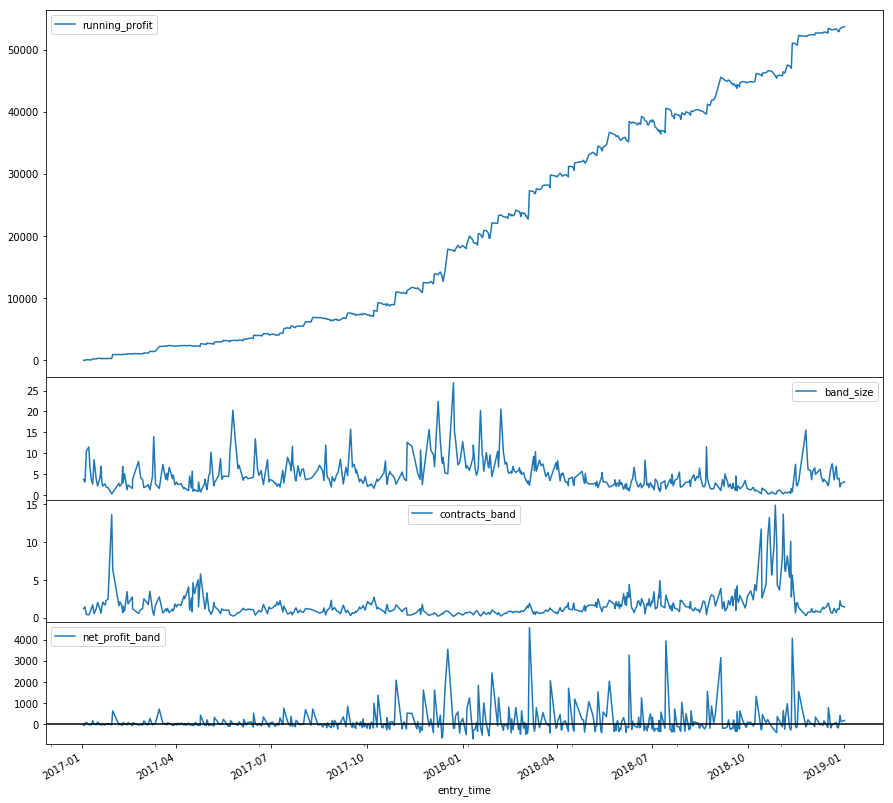

In [22]:
avg_band_size = trades["band_size"].mean()
print("average band size:",round(avg_band_size,1))
trades["contracts_band"] = avg_band_size/trades["band_size"]
trades["net_profit_band"] = trades["net_profit"]*trades["contracts_band"]
trades["running_profit"] = trades["net_profit_band"].cumsum()
#trades.plot(x="entry_time",y="running_profit",title="Equity curve($)")
#trades.plot(x="entry_time",y="net_profit_band",title="net profit each trade ($)")
#plt.axhline(0,color="k")
fig,axes = plt.subplots(nrows=4,ncols=1,figsize=(15,15),gridspec_kw = {'height_ratios':[3,1,1,1]},sharex=True)
plt.subplots_adjust(hspace=.0)
trades.plot(x="entry_time",y="running_profit",ax=axes[0])
trades.plot(x="entry_time",y="band_size",ax=axes[1])
trades.plot(x="entry_time",y="contracts_band",ax=axes[2])
trades.plot(x="entry_time",y="net_profit_band",ax=axes[3])
plt.axhline(0,color="k")
trades["min_equity"] = trades[::-1]["running_profit"].cummin()
trades["dd"] = trades["running_profit"]-trades["min_equity"]
max_dd = round(trades["dd"].max())
profit = round(trades["running_profit"].values[-1])
dd_per = round((max_dd/profit)*100)
print("max_dd($):",max_dd)
print("dd(%)    :",dd_per)
print("profit($):",profit)
print("profit per trade:",trades["net_profit_band"].mean())

## Standardised to $10,000 purchasing power

max_dd($): 2437.0
dd(%)    : 5.0
profit($): 46578.0
profit per trade: 98.05957484941052


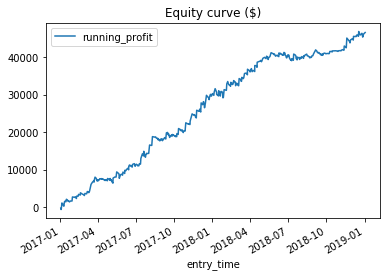

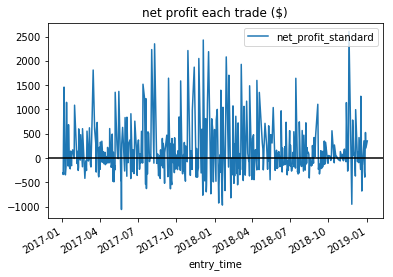

In [14]:
trades["contracts"] = 10000/trades["entry"]
trades["net_profit_standard"] = trades["net_profit"]*trades["contracts"]
trades["running_profit"] = trades["net_profit_standard"].cumsum()
trades.plot(x="entry_time",y="running_profit",title="Equity curve ($)")
trades.plot(x="entry_time",y="net_profit_standard",title="net profit each trade ($)")
plt.axhline(0,color="k")
trades["min_equity"] = trades[::-1]["running_profit"].cummin()
trades["dd"] = trades["running_profit"]-trades["min_equity"]
max_dd = round(trades["dd"].max())
profit = round(trades["running_profit"].values[-1])
dd_per = round((max_dd/profit)*100)
print("max_dd($):",max_dd)
print("dd(%)    :",dd_per)
print("profit($):",profit)
print("profit per trade:",trades["net_profit_standard"].mean())

## Intital band size vs profitability

In [30]:
win = (trades["profit%"]>1).sum()
loss = (trades["profit%"]<1).sum()
print("wins:",win)
print("loss:",loss)
print("win rate:",round(win/(win+loss)*100,1),"%")

wins: 173
loss: 302
win rate: 36.4 %


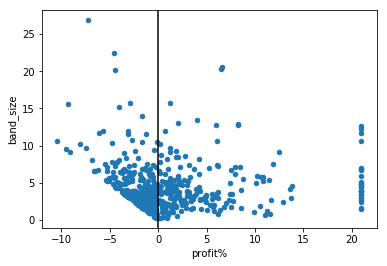

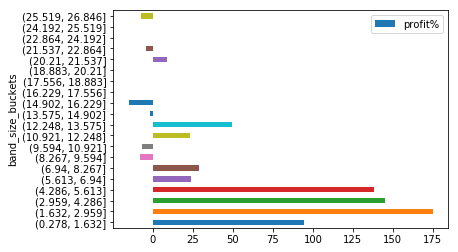

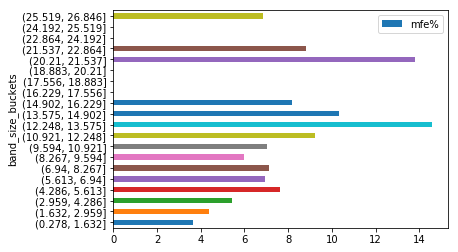

In [24]:
trades.plot.scatter("profit%","band_size")
plt.axvline(0,color="k")
trades["band_size_buckets"] = pd.cut(trades["band_size"],bins=20)
band_sizes = trades[["band_size_buckets","profit%","mfe%"]].groupby("band_size_buckets").agg({"profit%":"sum","mfe%":"mean"})
#display(band_sizes)
band_sizes.plot.barh(y="profit%")
band_sizes.plot.barh(y="mfe%")

## Would a target be benefitial?

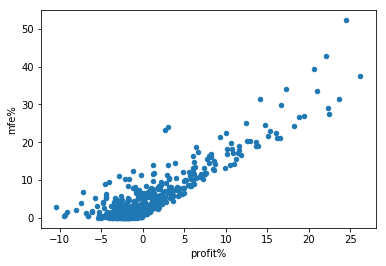

In [17]:
trades.plot.scatter(x="profit%",y="mfe%")

total profit %: 537.03
avg trade profit %: 1.13
total mfe %: 2776.7
avg trade mfe %: 5.85
# trades: 475


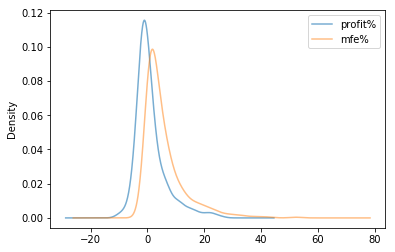

21 % is the best fixed target


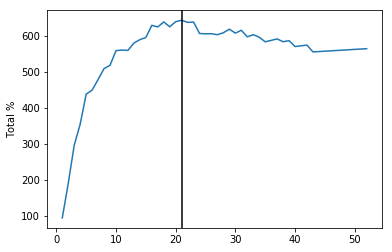

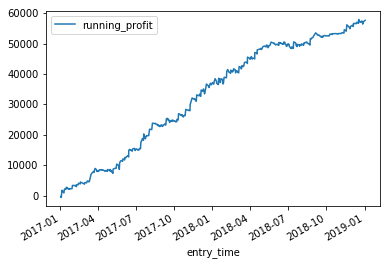

max_dd($): 2216.0
dd(%)    : 4.0
profit($): 57627.0


In [18]:
print("total profit %:",round(trades["profit%"].sum(),2))
print("avg trade profit %:",round(trades["profit%"].mean(),2))
print("total mfe %:",round(trades["mfe%"].sum(),2))
print("avg trade mfe %:",round(trades["mfe%"].mean(),2))
print("# trades:",len(trades))

ax = trades["profit%"].plot.density(alpha=0.6)
trades["mfe%"].plot.density(alpha=0.5,ax=ax)
plt.legend()
plt.show()

mfe_max = int(trades["mfe%"].max())
results = {}
for target in [x for x in range(1,mfe_max+1)]:
    hit_target = (trades["mfe%"]>= target).sum()*target
    missed_target = trades[trades["mfe%"]< target]["profit%"].sum()
    results[target] = hit_target + missed_target
    
results = pd.Series(results)
best_target = results.idxmax()
print(best_target,"% is the best fixed target")
results.plot()
plt.ylabel("Total %")
plt.axvline(best_target,color="k")
plt.show()
  
## equity curve of best fixed target
hit_target = trades["mfe%"]>= best_target
trades.loc[hit_target,"net_profit"] = trades.loc[hit_target,"entry"]*(best_target/100)
trades.loc[hit_target,"profit%"] = best_target

## standardised
trades["contracts"] = 10000/trades["entry"]
trades["net_profit_standard"] = trades["net_profit"]*trades["contracts"]
trades["running_profit"] = trades["net_profit_standard"].cumsum()
## nothing
#trades["running_profit"] = trades["net_profit"].cumsum()
#####
trades.plot(x="entry_time",y="running_profit")
plt.show()
trades["min_equity"] = trades[::-1]["running_profit"].cummin()
trades["dd"] = trades["running_profit"]-trades["min_equity"]
max_dd = round(trades["dd"].max())
profit = round(trades["running_profit"].values[-1])
dd_per = round((max_dd/profit)*100)
print("max_dd($):",max_dd)
print("dd(%)    :",dd_per)
print("profit($):",profit)


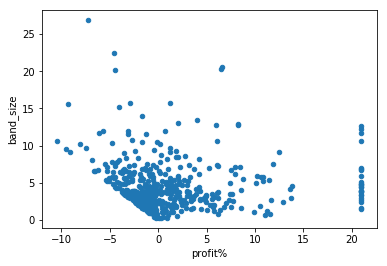

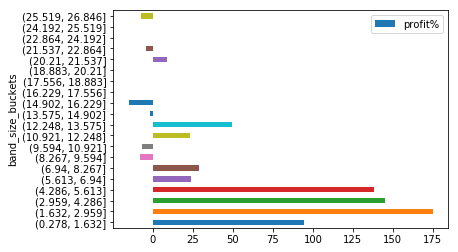

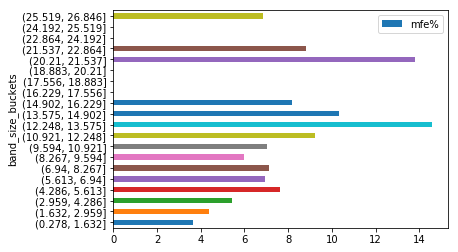

In [23]:
trades.plot.scatter("profit%","band_size")
trades["band_size_buckets"] = pd.cut(trades["band_size"],bins=20)
band_sizes = trades[["band_size_buckets","profit%","mfe%"]].groupby("band_size_buckets").agg({"profit%":"sum","mfe%":"mean"})
#display(band_sizes)
band_sizes.plot.barh(y="profit%")
band_sizes.plot.barh(y="mfe%")

## Dynamic chart (will not render in GITHUB)

In [31]:
#import plotly.plotly as py
#from plotly import tools
#from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode(connected=True)         # initiate notebook for offline plot
#
#from plotly.graph_objs import *
#import plotly.graph_objs as go
#
#### plotly plot ####
#
#trace0 = go.Scattergl(
#    x = data["timestamp"], 
#    y = data["high_chan"],
#    line = dict(
#           width = 1,
#           color = "green",
#           dash = "dash"),
#    name = "chan_high")
#
#trace1 = go.Scattergl(
#    x = data["timestamp"], 
#    y = data["low_chan"],
#    line = dict(
#           width = 1,
#           color = "red",
#           dash = "dash"),
#    name = "chan_low")
#
#trace2 = go.Scattergl(
#    x = data["timestamp"], 
#    y = data["ask_high"],
#    line = dict(
#           width = 1,
#           color = "grey"),
#    name = "ask_high")
#
#trace3 = go.Scattergl(
#    x = data["timestamp"], 
#    y = data["bid_low"],
#    line = dict(
#           width = 1,
#           color = "grey"),
#    name = "bid_low")
#
#trace4 = go.Scattergl(
#    x = data["timestamp"], 
#    y = data["long_trail"],
#    line = dict(
#           width = 2,
#           color = "blue",
#           dash = "dash"),
#    name = "long_trail")
#
#trace5 = go.Scattergl(
#    x = data["timestamp"], 
#    y = data["short_trail"],
#    line = dict(
#           width = 2,
#           color = "blue",
#           dash = "dash"),
#    name = "short_trail")
#
#
#trace8 = go.Scattergl(
#    x = trades["entry_time"], 
#    y = trades["entry"],
#    name = "entry",
#    mode = "markers",
#    marker = dict(
#           size = 8,
#           color = "purple"),
#)
#trace9 = go.Scattergl(
#    x = trades["exit_time"], 
#    y = trades["exit"],
#    name = "exit",
#    mode = "markers",
#    marker = dict(
#           size = 8,
#           color = "black"),
#)
#plot = [trace0,trace1,trace2,trace3,trace8,trace9] #trace4,trace5
##iplot(plot)
#
#trace10 = go.Scattergl(
#    x = trades["exit_time"], 
#    y = trades["profit%"],
#    line = dict(
#           width = 1,
#           color = "green",
#           dash = "dash"),
#    name = "profit%")
#plot1 = [trace10]
##iplot(plot1)
#
#fig = tools.make_subplots(rows=2, cols=1, specs=[[{}], [{}]],
#                          shared_xaxes=True, shared_yaxes=False,vertical_spacing=0.001)
#for trace in plot1:
#    fig.append_trace(trace, 2, 1)
#for trace in plot:
#    fig.append_trace(trace, 1, 1)
#
#fig['layout'].update(title='Stacked Subplots with Shared X-Axes',height=600)#height=600, width=600
#iplot(fig)